<a href="https://colab.research.google.com/github/Ash100/Minor/blob/main/HawDock_GBSA_Ploting_merging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Change the filename below to match your actual file name
df = pd.read_csv("/content/AR_04.csv")  # use sep='\t' if tab-delimited
df.head()


,RESIDUE_ID,VDW,ELE,GB,SA,TOTAL
0,R-A-GLU-1,0.0,-0.72,0.72,0.0,0.00
1,R-A-CYS-2,0.0,-0.02,0.03,0.0,0.01
2,R-A-GLN-3,0.0,0.28,-0.27,0.0,0.01
3,R-A-PRO-4,0.0,-0.16,0.16,0.0,0.00
4,R-A-ILE-5,0.0,-0.17,0.17,0.0,0.00


Enter motif residues (comma-separated, exactly as in RESIDUE_ID column): L-A-LEU-53,L-A-THR-54,L-A-LYS-55,L-A-LEU-56,L-A-LEU-57

Motif residues found in data: ['L-A-LEU-53', 'L-A-THR-54', 'L-A-LYS-55', 'L-A-LEU-56', 'L-A-LEU-57']



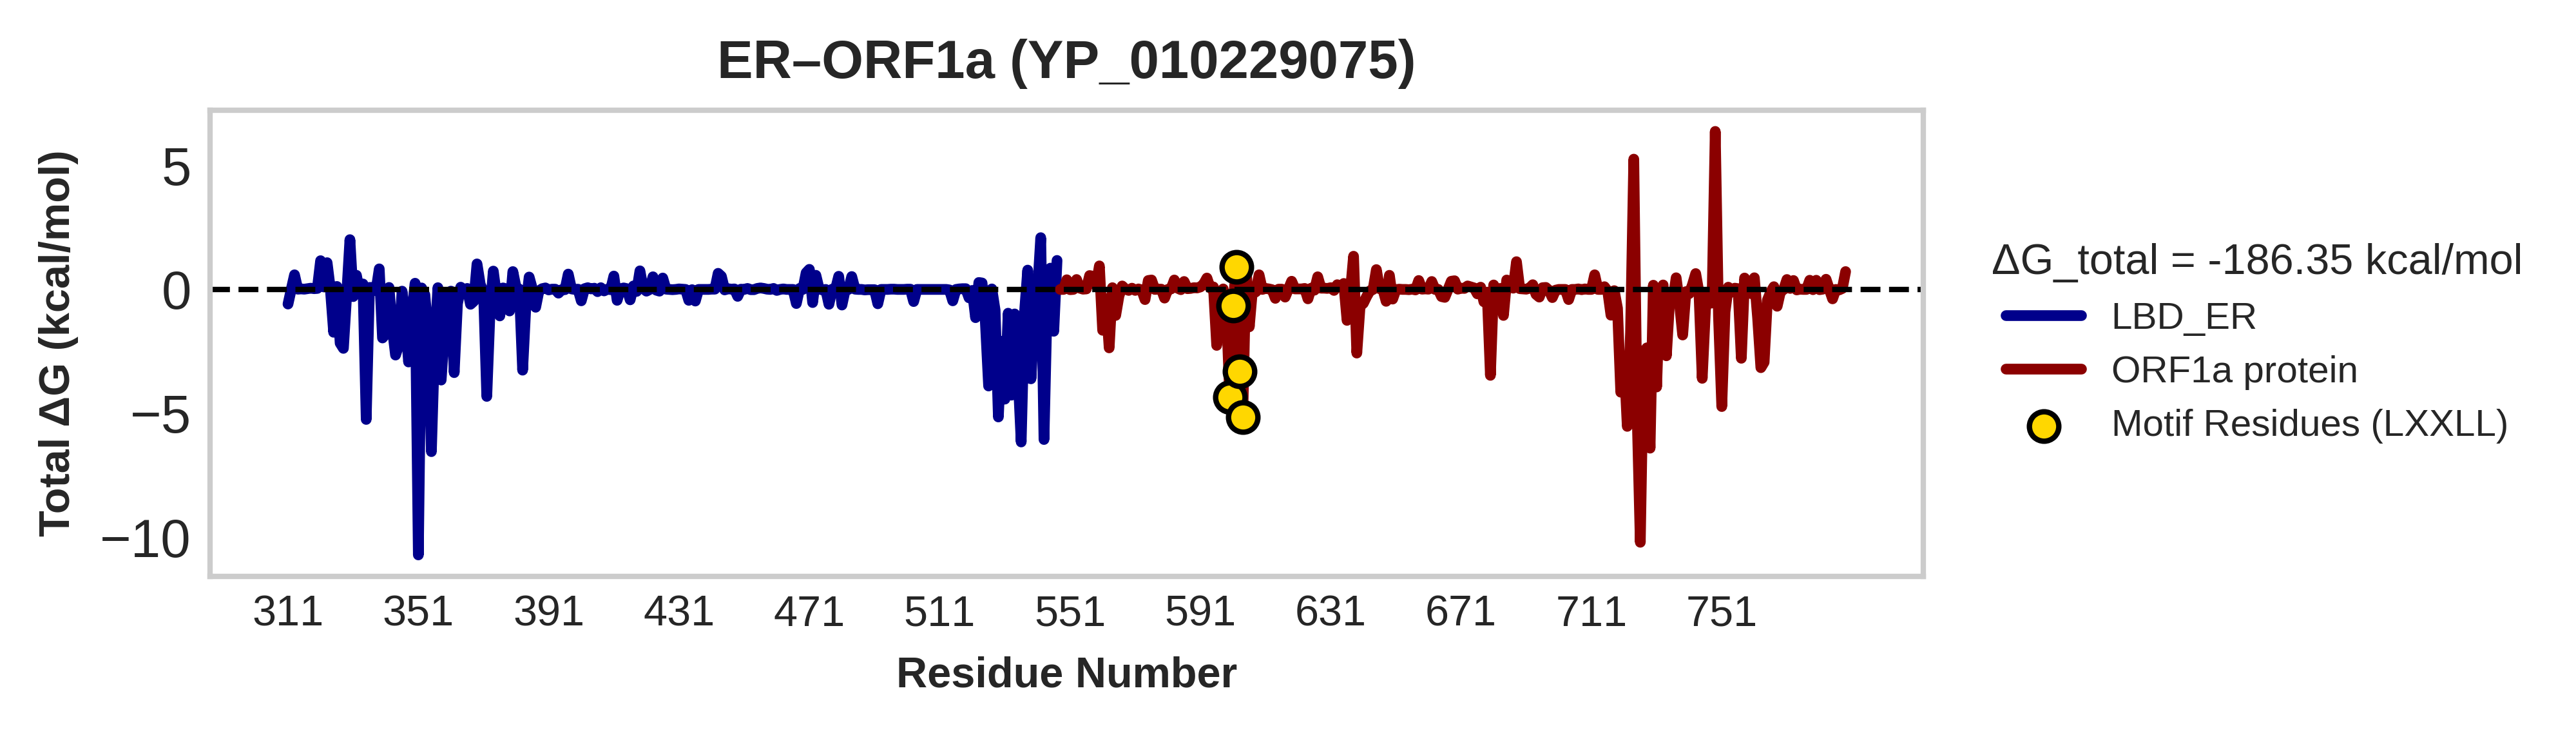

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# --- Load CSV ---
df = pd.read_csv("/content/YP_010229075.csv")  # change filename if needed

# --- Identify Chain Based on RESIDUE_ID ---
# Rename chains to actual protein names
df['CHAIN'] = df['RESIDUE_ID'].apply(lambda x: 'Estrogen receptor (ER)' if x.startswith('R-') else
                                                 'Coactivator Peptide (Rex)' if x.startswith('L-') else 'Other')

# --- Ask user for motif residues ---
motif_input = input("Enter motif residues (comma-separated, exactly as in RESIDUE_ID column): ")
motif_residues = [r.strip() for r in motif_input.split(',') if r.strip() in df['RESIDUE_ID'].values]
print(f"\nMotif residues found in data: {motif_residues}\n")

# --- Compute total ΔG (sum of TOTAL column) ---
total_dG = df['TOTAL'].sum()
dG_label = f"ΔG_total = {total_dG:.2f} kcal/mol"

# --- Create a numeric axis starting at 669 ---
x_start = 311
x_values = list(range(x_start, x_start + len(df)))  # numeric residue positions
df['x_axis'] = x_values

# --- Plot configuration ---
mpl.rcParams['figure.dpi'] = 600
plt.style.use('seaborn-v0_8-whitegrid')

fig, ax = plt.subplots(figsize=(8, 2))

# --- Plot AR (Receptor Chain) ---
r_df = df[df['CHAIN'] == 'Estrogen receptor (ER)']
ax.plot(r_df['x_axis'], r_df['TOTAL'], color='darkblue', linewidth=2, label='LBD_ER')

# --- Plot Coactivator Peptide (Ligand Chain) ---
l_df = df[df['CHAIN'] == 'Coactivator Peptide (Rex)']
ax.plot(l_df['x_axis'], l_df['TOTAL'], color='darkred', linewidth=2, label='ORF1a protein')

# --- Highlight motif residues ---
motif_df = df[df['RESIDUE_ID'].isin(motif_residues)]
ax.scatter(motif_df['x_axis'], motif_df['TOTAL'],
           color='gold', s=30, edgecolor='black', zorder=5, label='Motif Residues (LXXLL)')

# --- Reference line ---
ax.axhline(0, color='black', linestyle='--', linewidth=1)

# --- Remove grid lines for clean look ---
ax.grid(False)

# --- Axis labeling ---
ax.set_xlabel('Residue Number', fontsize=8, fontweight='bold')
ax.set_ylabel('Total ΔG (kcal/mol)', fontsize=8, fontweight='bold')
ax.set_title('ER–ORF1a (YP_010229075)', fontsize=10, fontweight='bold')

# --- X-axis ticks: start 669, increment 20 ---
ax.set_xticks(range(x_start, x_start + len(df), 40))
ax.set_xticklabels(range(x_start, x_start + len(df), 40), fontsize=8)

# --- Legend outside (right side) with smaller text ---
ax.legend(
    title=dG_label,
    fontsize=7,
    title_fontsize=8,
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    frameon=False
)

plt.tight_layout(rect=[0, 0, 0.85, 1])  # leave space on right for legend
plt.savefig("/content/YP_010229075_ER.png", dpi=600, bbox_inches='tight')
plt.show()


In [ ]:
!pip install pillow matplotlib


In [39]:
from PIL import Image

# List of input images
image_files = ["NP_041004_AR.png", "YP_401715_AR.png", "NP_536616_AR.png", "NP_690897_AR.png", "NP_056919_ER.png", "NP_040193_ER.png", "YP_009709863_ER.png", "YP_010229075_ER.png", "YP_401715_ER.png", "NP_694871_ER.png"]

# Open images and ensure they all have same size
images = [Image.open(f) for f in image_files]
widths, heights = zip(*(img.size for img in images))

# Assuming 2 columns (2 plots per image) and 5 rows (5 images)
max_width = max(widths)
total_height = sum(heights)

# Create a blank canvas
merged_image = Image.new('RGB', (max_width, total_height), color=(255, 255, 255))

# Paste images one by one
y_offset = 0
for img in images:
    merged_image.paste(img, (0, y_offset))
    y_offset += img.height

# Save final merged figure at 600 dpi
merged_image.save("merged_MMGBSA.png", dpi=(600,600))
print("Merged figure saved as merged_MMGBSA.png")


Merged figure saved as merged_MMGBSA.png


In [40]:
!pip install pillow

from PIL import Image, ImageDraw, ImageFont

# Your 10 images
imgs = ["NP_041004_AR.png", "YP_401715_AR.png", "NP_536616_AR.png", "NP_690897_AR.png", "NP_056919_ER.png", "NP_040193_ER.png", "YP_009709863_ER.png", "YP_010229075_ER.png", "YP_401715_ER.png", "NP_694871_ER.png"]

images = [Image.open(f).convert("RGB") for f in imgs]
w, h = images[0].size  # assuming same size
cols, rows = 4, 3
padding = 50
bg = (255,255,255)

# Canvas (extra space for 2 blank slots)
W = cols*w + (cols+1)*padding
H = rows*h + (rows+1)*padding
merged = Image.new("RGB",(W,H),bg)

# Paste & label
font = ImageFont.load_default()
for i, img in enumerate(images):
    col, row = i % cols, i // cols
    x, y = padding + col*(w+padding), padding + row*(h+padding)
    merged.paste(img, (x,y))
    # Label as A–J
    draw = ImageDraw.Draw(merged)
    label = chr(65+i)  # 'A'...'J'
    draw.text((x+10, y+10), label, fill=(0,0,0), font=font)

# Save high-res & compact version
merged.save("MMGBSA_10plots_600dpi.tiff", dpi=(600,600))
merged.save("MMGBSA_10plots_300dpi.tiff", dpi=(300,300))
print("✅ Saved both 600 dpi (archive) and 300 dpi (journal) versions.")


✅ Saved both 600 dpi (archive) and 300 dpi (journal) versions.
